**Coursework Breakdown - Delete**


**Objective**

You will prepare a tutorial in which you showcase the Jupyter Notebook capabilities in demonstrating a machine learning pipeline of your choice. You are
encouraged to look up for online tutorials to use as examples, but you need to
develop your own pipeline. The final aim is to create an example of developing
an AI system that can be showcased online and can be used as part of your
portfolio in job applications.

**Must Include**
1. A clear title that illustrates the topic of the tutorial. - ✅
2. An abstract of 80 to 100 words that summarises the content. - ✅
3. A list of learning objectives that will be achieved by following this tutorial. - ✅
4. A table of content. - ✅
6. At least the following libraries: Pytorch, Matplotlib, Numpy. - ✅
7. Use of markup. - ✅
9. Use one dataset, e.g., the MNIST - ✅
10. A training process for a machine learning algorithm, e.g., the optimization
of a neural model. - ✅
11. How different configurations of hyper-parameters affects the results.  - ✅
12. Results with both graphs and tables. - ✅
5. Differences with pros and cons in relation to cited sources of similar online
tutorials.
8. Clear identification of sources to avoid plagiarism.
13. A list of references at the end.
14. A reading time of 10 to 15 minutes.

**Marking Scheme**

Marks will be awarded according to the following criteria:

• Completeness: Does the tutorial cover all required components (e.g.,
abstract, objectives, dataset, training process, results, references, etc.)?
[25%]

• Clarity and code quality: Are the explanations logically structured and
easy to follow? Do they enhance the learning experience? Is the Jupyter
Notebook code well-structured, efficient, and properly documented? Does
it execute correctly? [25%]

• Presentation quality and professional elements: : Are graphs, tables, and markdown explanations clear and informative? Do they enhance
the tutorial’s readability? [25%]

• Originality and critical thinking: Does the tutorial show a unique
perspective, creativity, or novel insights beyond existing tutorials? Does
it critically compare different techniques? [25%]


# **Handwritten Digit Recognition with PyTorch: A CNN Approach**

## **Abstract**

This project demonstrates the capabilities of Jupyter Notebook by developing a machine learning (ML) pipeline for Optical Character Recognition (OCR). The pipeline takes an image as input, processes it using pre-processing techniques, and extracts the text within it, providing users with a readable and copyable output. It utilises libraries such as [input libraries] to achieve this, resulting in accurate and efficient text extraction. This showcases Jupyter Notebook’s effectiveness in building and executing ML workflows for real-world applications.

## **Contents**


* [Learning Objectives](#learning-objectives)
* [Required Imports](#required-imports)
* [Neural Network Algorithm](#nna)
* [How Hyper-Parameters Affect the Model](#hyper-parameters)
* [Results](#results)
* [References](#references)

## **Learning Objectives** <a class="anchor" id="learning-objectives"></a>

* Learn to structure an AI workflow in Jupyter Notebook for better readability and reproducibility
* Learn how to set up a machine learning environment - import necessary libraries and understand what they do
* Learn how to load an pre-process data
* Build a Convolutional Neural Network (CNN), and understand what each layer does
* Train a Neural Network - different techniques used to improve the performance of the model (backpropagation)
* Learn how to effectively evaluate, visualise and showcase a models performance
* Learn the effect each hyperparameter has, and how to tune them correctly

## **Required Imports** <a class="anchor" id="required-imports"></a>

In [62]:
%pip install torch torchvision numpy matplotlib opencv-python pytesseract pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.6 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/11.6 MB 7.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.6 MB 8.8 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.6 MB 9.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 9.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


## **Neural Network Algorithm** <a class="anchor" id="nna"></a>

In [87]:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check dataset size
print(f"Train set: {len(trainset)}, Test set: {len(testset)}")


100%|██████████| 9.91M/9.91M [00:01<00:00, 7.53MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 277kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.36MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.55MB/s]

Train set: 60000, Test set: 10000


In [99]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Calculate the correct input size for fc1
        # After two pooling layers, the image size is reduced to 7x7
        # With 64 channels, the flattened size is 64 * 7 * 7 = 3136
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
model = CNN()


In [100]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10  # Increased epochs for better learning
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Lists to store training & validation statistics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = []
best_val_acc = 0.0

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate training loss & accuracy
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # **Validation Phase**
    model.eval()  # Set model to evaluation mode
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(testloader)
    val_acc = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")

    print(f"Epoch {epoch+1}/{num_epochs} - "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

print("Training complete. Best Validation Accuracy: {:.2f}%".format(best_val_acc))

Epoch 1/5 - Loss: 0.0085, Accuracy: 99.71%
Epoch 2/5 - Loss: 0.0087, Accuracy: 99.72%
Epoch 3/5 - Loss: 0.0072, Accuracy: 99.76%
Epoch 4/5 - Loss: 0.0056, Accuracy: 99.82%
Epoch 5/5 - Loss: 0.0059, Accuracy: 99.81%
Training complete.


## **How Hyper-Parameters Affect the Model** <a class="anchor" id="hyper-parameters"></a>

1. Batch Size:
    What it does? - Determines how many samples are passed to the model at a time during training.
    Effects:
        Larger => Faster Training, but will result in worse diverse results.
        Smaller => Slower Training, but will result in better results.

2. Shuffle:
    What it does? - Randomly shuffles the dataset before each epoch.
    Effects:
        True => Default for training. Helps the model generalise better by preventing it from memorising data order.
        False => Ensures evaluation is done on the same ordered dataset.

3. Normalisation:
    What it does? - Normalises pixel values to a range between two points.
    Effect: Improves the convergence making training on the data more stable. If not normalised well, can result in less efficient learning or poor performance.

4. Number of Filters:
    What it does? - Defines the number of convolutional kernels that can detect patterns.
    Effects:
        More => Longer computation but better feature detection.
        Less => Faster training times, but less effective feature detection.

5. Kernel Size:
    What it does? - Size of the filter that scans the image.
    Effect: 
        Larger => Captures larger patterns but may miss the smaller details.
        Smaller => Preserves the fine details but results in longer training times.

6. Padding:
    What it does? - Adds extra pixels to maintain spatial dimensions.
    Effect: Keeps the output size the same to prevent information loss

7. Pooling Size:
    What it does? - Reduces dimensions while preserving important features.
    Effect: 
        Larger => Reduces size more, but may remove details.
        Smaller => Reduces size but will keep some key details

8. Stride:
    What it does? - Determines how far the filter moves each step.
    Effect: Keeps output size the same and prevents information loss

9. Fully Connected Layer Size:
    What it does? - Number of neurons in the dense layer.
    Effect:
        More => Allows the model to capture more complex features, but results in larger training times.

10. Activation Function:
    What it does? - Introduces non-linearity.
    Effect: Speeds up training times and prevents vanishing gradients.

11. Learninig Rate:
    What it does? - 
    Effect: 
        Lower => Slower training but more stable
        Higher => Faster training but risk of overfitting

12. Epochs:
    What it does? - Determines the number of times the model trains on the dataset.
    Effect: More epochs allows deeper learning, but may cause overfitting.

13. Optimiser:
    What it does? - 
    Effect: By using Adam instead of ...

## **Results** <a class="anchor" id="results"></a>

In [106]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')


Accuracy on test set: 99.15%


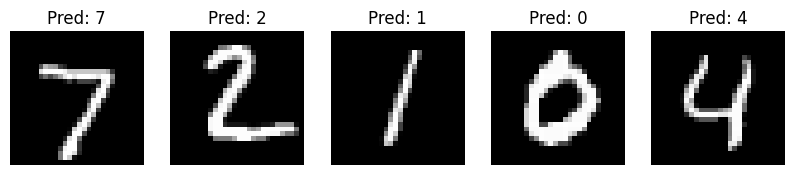

In [107]:
# Function to display an image and prediction
def visualize_predictions():
    images, labels = next(iter(testloader))
    outputs = model(images.to(device))
    _, predictions = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 5, figsize=(10,2))
    for i in range(5):
        img = images[i].numpy().squeeze()
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f'Pred: {predictions[i].item()}')
        axes[i].axis('off')
    plt.show()

visualize_predictions()


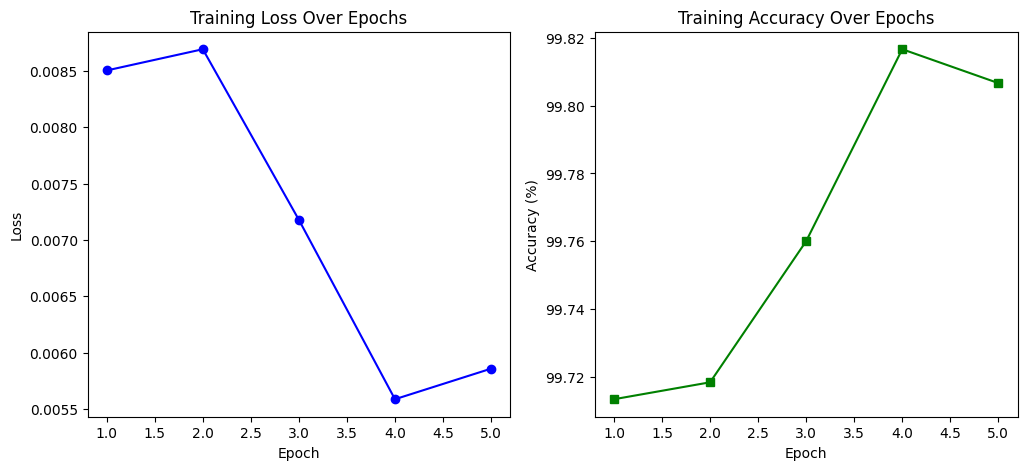

In [108]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, marker='s', linestyle='-', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')

plt.show()

## **References** <a class="anchor" id="references"></a>